In [1]:
# 모델명은 KakaoCrawling이며, 파라미터는 2개로 시작페이지, 끝 페이지로 구성되는 코드
import requests
from bs4 import BeautifulSoup
import pandas as pd
def KakaoCrawling(start_page, end_page):
  title_list = []
  data_list = [] # 날짜
  end_price = [] # 종가
  start_price = [] # 시가
  up_down_price = [] # 전일비
  top_price = [] # 고가
  below_price = [] # 저가
  trade_price = [] # 거래량
  for i in range(start_page, end_page + 1):
    url = 'https://finance.naver.com/item/sise_day.naver?code=041510&page=' + str(i)
    headers = {'User-Agent':'Mozilla/5.0'}
    res = requests.get(url, headers=headers)
    soup = BeautifulSoup(res.text, 'html.parser')
    # 증권 속성 추출
    title = soup.select('table.type2 > tr > th')
    if len(title_list) == 0:
      for i in title:
        title_list.append(i.text)
    # 수치 데이터 추출
    num_data = soup.select('tr > td > span.tah')
    num_data_list = []
    for i in num_data:
      num_data_list.append(i.text)
    # 특정 인덱스에 7를 나눈 후 나머지를 통해 각 증권 속성에 대한 데이터를 추출할 수 있음
    for idx, val in enumerate(num_data_list):
      if idx % 7 == 0: # 날짜
        data_list.append(val)
      elif idx % 7 == 1: # 종가
        end_price.append(int(val.replace(',','')))
      elif idx % 7 == 2: # 전일비
        up_down_price.append(int(val.strip().replace(',','')))
      elif idx % 7 == 3: # 시가
        start_price.append(int(val.replace(',','')))
      elif idx % 7 == 4: # 고가
        top_price.append(int(val.replace(',','')))
      elif idx % 7 == 5: # 저가
        below_price.append(int(val.replace(',','')))
      else: # 거래량
        trade_price.append(int(val.replace(',','')))
  up_down_price_result = []
  for i, j, k in zip(up_down_price, end_price, start_price):
    if j < k:
      up_down_price_result.append(-i)
    else:
      up_down_price_result.append(i)
  df_dic = {'날짜':data_list,'종가':end_price,'시가':start_price,'전일비':up_down_price_result,'고가':top_price,'저가':below_price,'거래량':trade_price}
  df = pd.DataFrame(df_dic)
  return df

In [2]:
# 모델 테스트1
KakaoCrawling(1, 8) # 'sm 엔터테인먼트'에 대한 증권 페이지 1쪽 부터 8쪽

,날짜,종가,시가,전일비,고가,저가,거래량
0,2023.10.25,110900,114000,-2100,114600,109300,195937
1,2023.10.24,113000,112500,300,113000,106900,293835
2,2023.10.23,112700,111600,700,114000,110800,133736
3,2023.10.20,113400,114500,-2100,116300,111500,176440
4,2023.10.19,115500,118500,-5400,119900,115200,175883
...,...,...,...,...,...,...,...
75,2023.07.04,109300,106800,2500,111600,105200,277584
76,2023.07.03,106800,107300,0,107400,103500,220891
77,2023.06.30,106800,107000,-200,108800,105200,202510
78,2023.06.29,107000,107400,-300,110500,105300,258872


In [3]:
# 모델 테스트2
KakaoCrawling(3, 12) # 페이지 3쪽 부터 12쪽

,날짜,종가,시가,전일비,고가,저가,거래량
0,2023.09.20,132500,132700,-600,134300,130900,93029
1,2023.09.19,133100,133200,0,135400,132400,90099
2,2023.09.18,133100,134100,-2100,136800,132700,111570
3,2023.09.15,135200,138900,-4000,139200,134200,183642
4,2023.09.14,139200,138100,1800,141500,137800,172600
...,...,...,...,...,...,...,...
95,2023.05.04,107300,113300,-5200,113700,106200,378978
96,2023.05.03,112500,112600,-100,116600,111200,466539
97,2023.05.02,112600,107300,5400,113900,106800,361912
98,2023.04.28,107200,107300,-1000,110000,106400,258476


In [4]:
# 시각화 모델 생성
import matplotlib.pyplot as plt
def Visualize(df): # 그래프 순서: 날짜별 종가 변화, 날짜별 거래량 변화, 날짜별 전일비 변화
  plt.plot(df['날짜'], df['종가'])
  plt.scatter(df['날짜'], df['종가'])
  plt.xticks(ticks=df['날짜'], rotation = 45)
  plt.show()
  plt.plot(df['날짜'], df['거래량'])
  plt.scatter(df['날짜'], df['거래량'])
  plt.xticks(ticks = df['날짜'], rotation = 45)
  plt.show()
  color = []
  for i in df['전일비']:
    if i >= 0:
      color.append('red')
    else:
      color.append('blue')
  plt.bar(df['날짜'], df['전일비'], color = color)
  plt.xlabel('Date')
  plt.xticks(ticks = df['날짜'], rotation = 45)
  plt.show()

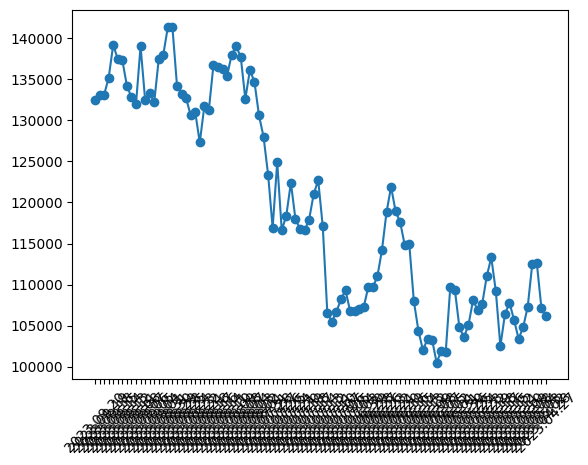

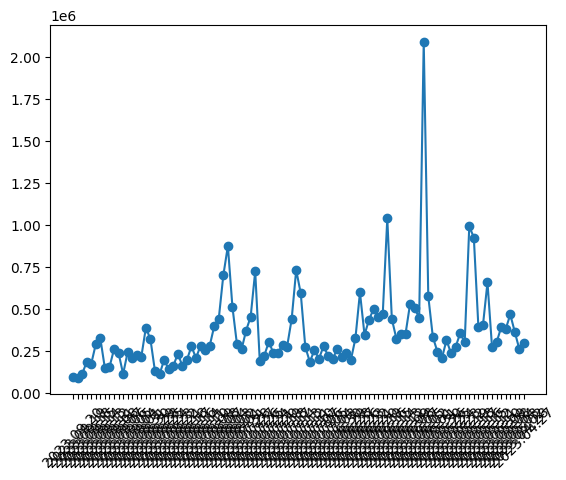

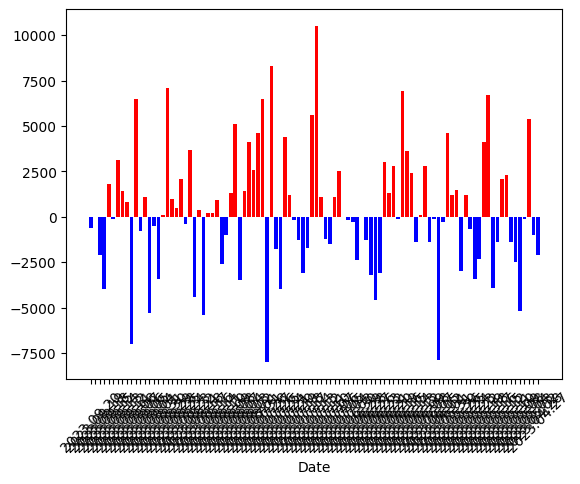

In [5]:
# 시각화 모델 테스트
data = KakaoCrawling(3, 12)
Visualize(data)